In [1]:
import os
import leafmap
import numpy as np

In [2]:
os.environ["NODATA"] = "-32768"

In [3]:
m = leafmap.Map()
m.add_basemap("OpenTopoMap")
m.add_basemap("USGS 3DEP Elevation")
m.add_basemap("USGS Hydrography")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [4]:
lat = 44.361169
lon = -122.821802

m = leafmap.Map(center=[lat, lon], zoom=10)
m.add_marker([lat, lon])
m

Map(center=[44.361169, -122.821802], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [5]:
geometry = {"x": lon, "y": lat}

In [6]:
gdf = leafmap.get_wbd(geometry, digit=10, return_geometry=True)
gdf.explore()

In [7]:
gdf.to_file("basin.geojson")

In [8]:
array = leafmap.get_3dep_dem(
    gdf,
    resolution=30,
    output="dem.tif",
    dst_crs="EPSG:3857",
    to_cog=True,
    overwrite=True,
)
array

Reading input: /home/zyang91/Desktop/intro-to-gis/notebook/dem.tif

Adding overviews...
Updating dataset tags...
Writing output to: /home/zyang91/Desktop/intro-to-gis/notebook/dem.tif


<xarray.DataArray 'elevation' (y: 2488, x: 2727)> Size: 27MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(2488, 2727), dtype=float32)
Coordinates:
  * x            (x) float64 22kB -1.371e+07 -1.371e+07 ... -1.361e+07
  * y            (y) float64 20kB 5.565e+06 5.565e+06 ... 5.478e+06 5.478e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    scale_factor:         1.0
    add_offset:           0.0
    units:                m
    vertical_datum:       NAVD88
    vertical_resolution:  0.001
    _FillValue:           nan

In [9]:
m.add_raster("dem.tif", palette="terrain", nodata=np.nan, layer_name="DEM")
m

Map(bottom=95254.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['position…

In [10]:
metadata = leafmap.image_metadata("dem.tif")
metadata

{'bounds': {'left': -123.163442,
  'bottom': 44.080546,
  'right': -122.30379,
  'top': 44.641282},
 'crs': 'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]',
 'band_metadata': [('b1', {})],
 'band_descriptions': [('b1', 'elevation')],
 'dtype': 'float32',
 'nodata_type': 'Nodata',
 'colorinterp': ['gray'],
 'scales': [1.0],
 'offsets': [0.0],
 'colormap': None,
 

In [11]:
leafmap.image_min_max("dem.tif")

(69.47406768798828, 1524.53759765625)

In [12]:
m.add_colormap(cmap="terrain", vmin="60", vmax=1500, label="Elevation (m)")

In [13]:
wbt = leafmap.WhiteboxTools()

In [14]:
wbt.version()

"WhiteboxTools v2.4.0 (c) Dr. John Lindsay 2017-2023\n\nWhiteboxTools is an advanced geospatial data analysis platform developed at\nthe University of Guelph's Geomorphometry and Hydrogeomatics Research \nGroup (GHRG). See www.whiteboxgeo.com for more details.\n"

In [15]:
leafmap.whiteboxgui()

In [16]:
wbt.set_working_dir(os.getcwd())
wbt.verbose = True

In [17]:
wbt.feature_preserving_smoothing("dem.tif", "smoothed.tif", filter=9)

./whitebox_tools --run="FeaturePreservingSmoothing" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='dem.tif' --output='smoothed.tif' --filter=9 --norm_diff=15.0 --num_iter=3 --max_diff=0.5 -v --compress_rasters=False

*****************************************
* Welcome to FeaturePreservingSmoothing *
* Powered by WhiteboxTools              *
* www.whiteboxgeo.com                   *
*****************************************
Reading data...
Calculating normal vectors: 0%
Calculating normal vectors: 1%
Calculating normal vectors: 2%
Calculating normal vectors: 3%
Calculating normal vectors: 4%
Calculating normal vectors: 5%
Calculating normal vectors: 6%
Calculating normal vectors: 7%
Calculating normal vectors: 8%
Calculating normal vectors: 9%
Calculating normal vectors: 10%
Calculating normal vectors: 11%
Calculating normal vectors: 12%
Calculating normal vectors: 13%
Calculating normal vectors: 14%
Calculating normal vectors: 15%
Calculating normal vectors: 16%
Calculating 

0

In [18]:
m = leafmap.Map()
m.add_basemap("Satellite")
m.add_raster("smoothed.tif", colormap="terrain", layer_name="Smoothed DEM")
m.add_geojson("basin.geojson", layer_name="Watershed", info_mode=None)
m.add_basemap("USGS Hydrography", show=False)
m

Map(center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [19]:
wbt.hillshade("smoothed.tif", "hillshade.tif", azimuth=315, altitude=35)

./whitebox_tools --run="Hillshade" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='smoothed.tif' --output='hillshade.tif' --azimuth=315 --altitude=35 -v --compress_rasters=False

****************************
* Welcome to Hillshade     *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing

0

In [20]:
m.add_raster("hillshade.tif", layer_name="Hillshade")
m.layers[-1].opacity = 0.6

In [21]:
wbt.find_no_flow_cells("smoothed.tif", "no_flow.tif")

./whitebox_tools --run="FindNoFlowCells" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='smoothed.tif' --output='no_flow.tif' -v --compress_rasters=False

******************************
* Welcome to FindNoFlowCells *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Prog

0

In [ ]:
# elevation lower than their surroundings
m.add_raster("no_flow.tif", layer_name="No Flow Cells")
m

Map(bottom=380313.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['positio…

In [23]:
wbt.fill_depressions("smoothed.tif", "filled.tif")

./whitebox_tools --run="FillDepressions" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='smoothed.tif' --output='filled.tif' --fix_flats -v --compress_rasters=False

******************************
* Welcome to FillDepressions *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Finding pit cells: 6%
Finding pit cells: 12%
Finding pit cells: 18%
Finding pit cells: 25%
Finding pit cells: 31%
Finding pit cells: 37%
Finding pit cells: 43%
Finding pit cells: 50%
Finding pit cells: 56%
Finding pit cells: 62%
Finding pit cells: 68%
Finding pit cells: 75%
Finding pit cells: 81%
Finding pit cells: 87%
Finding pit cells: 93%
Finding pit cells: 100%
Filling depressions: 0%
Filling depressions: 1%
Filling depressions: 2%
Filling depressions: 3%
Filling depressions: 4%
Filling depressions: 5%
Filling depressions: 6%
Filling depressions: 7%
Filling depressions: 8%
Filling depressions: 9%
Filling depressions: 10%
Filling depressions:

0

In [27]:
wbt.breach_depressions("smoothed.tif", "breached.tif")

./whitebox_tools --run="BreachDepressions" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='smoothed.tif' --output='breached.tif' -v --compress_rasters=False

********************************
* Welcome to BreachDepressions *
* Powered by WhiteboxTools     *
* www.whiteboxgeo.com          *
********************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Pro

0

In [28]:
wbt.find_no_flow_cells("breached.tif", "no_flow_breached.tif")

./whitebox_tools --run="FindNoFlowCells" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='breached.tif' --output='no_flow_breached.tif' -v --compress_rasters=False

******************************
* Welcome to FindNoFlowCells *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress:

0

In [26]:
m.layers[-1].visible = False
m.add_raster("no_flow_breached.tif", layer_name="No Flow Cells after Breaching")
m

Map(bottom=3039705.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['positi…

In [29]:
wbt.d8_pointer("breached.tif", "flow_direction.tif")

./whitebox_tools --run="D8Pointer" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='breached.tif' --output='flow_direction.tif' -v --compress_rasters=False

****************************
* Welcome to D8Pointer     *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 4

0

In [30]:
m.add_raster("flow_direction.tif", layer_name="Flow Direction")
m

Map(bottom=95226.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['position…

In [31]:
wbt.d8_flow_accumulation("breached.tif", "flow_accum.tif")

./whitebox_tools --run="D8FlowAccumulation" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --input='breached.tif' --output='flow_accum.tif' --out_type=cells -v --compress_rasters=False

*********************************
* Welcome to D8FlowAccumulation *
* Powered by WhiteboxTools      *
* www.whiteboxgeo.com           *
*********************************
Reading data...
Flow directions: 0%
Flow directions: 1%
Flow directions: 2%
Flow directions: 3%
Flow directions: 4%
Flow directions: 5%
Flow directions: 6%
Flow directions: 7%
Flow directions: 8%
Flow directions: 9%
Flow directions: 10%
Flow directions: 11%
Flow directions: 12%
Flow directions: 13%
Flow directions: 14%
Flow directions: 15%
Flow directions: 16%
Flow directions: 17%
Flow directions: 18%
Flow directions: 19%
Flow directions: 20%
Flow directions: 21%
Flow directions: 22%
Flow directions: 23%
Flow directions: 24%
Flow directions: 25%
Flow directions: 26%
Flow directions: 27%
Flow directions: 28%
Flow directions: 29%
Flow

0

In [32]:
m.add_raster("flow_accum.tif", layer_name="Flow Accumulation")
m

Map(bottom=95224.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['position…

In [33]:
wbt.extract_streams("flow_accum.tif", "streams.tif", threshold=5000)

./whitebox_tools --run="ExtractStreams" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --flow_accum='flow_accum.tif' --output='streams.tif' --threshold='5000' -v --compress_rasters=False

*****************************
* Welcome to ExtractStreams *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress

0

In [34]:
m.layers[-1].visible = False
m.add_raster("streams.tif", layer_name="Streams")

In [35]:
m

Map(bottom=24039.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['position…

In [36]:
wbt.distance_to_outlet(
    "flow_direction.tif", streams="streams.tif", output="distance_to_outlet.tif"
)

./whitebox_tools --run="DistanceToOutlet" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --d8_pntr='flow_direction.tif' --streams='streams.tif' --output='distance_to_outlet.tif' -v --compress_rasters=False

*******************************
* Welcome to DistanceToOutlet *
* Powered by WhiteboxTools    *
* www.whiteboxgeo.com         *
*******************************
Reading pointer data...
Reading streams data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Pro

0

In [37]:
m.add_raster("distance_to_outlet.tif", layer_name="Distance to Outlet")
m

Map(bottom=380238.0, center=[44.360913999999994, -122.73361600000001], controls=(ZoomControl(options=['positio…

In [38]:
wbt.raster_streams_to_vector(
    "streams.tif", d8_pntr="flow_direction.tif", output="streams.shp"
)

./whitebox_tools --run="RasterStreamsToVector" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --streams='streams.tif' --d8_pntr='flow_direction.tif' --output='streams.shp' -v --compress_rasters=False

************************************
* Welcome to RasterStreamsToVector *
* Powered by WhiteboxTools         *
* www.whiteboxgeo.com              *
************************************
Reading pointer data...
Reading streams data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40

0

In [39]:
leafmap.vector_set_crs(source="streams.shp", output="streams.shp", crs="EPSG:3857")

In [40]:
m.add_shp(
    "streams.shp",
    layer_name="Streams Vector",
    style={"color": "#ff0000", "weight": 3},
    info_mode=None,
)
m

Map(bottom=12282.0, center=[43.46886761482925, -122.98095703125001], controls=(ZoomControl(options=['position'…

In [41]:
wbt.basins("flow_direction.tif", "basins.tif")

./whitebox_tools --run="Basins" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --d8_pntr='flow_direction.tif' --output='basins.tif' -v --compress_rasters=False

****************************
* Welcome to Basins        *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Initializing: 0%
Initializing: 1%
Initializing: 2%
Initializing: 3%
Initializing: 4%
Initializing: 5%
Initializing: 6%
Initializing: 7%
Initializing: 8%
Initializing: 9%
Initializing: 10%
Initializing: 11%
Initializing: 12%
Initializing: 13%
Initializing: 14%
Initializing: 15%
Initializing: 16%
Initializing: 17%
Initializing: 18%
Initializing: 19%
Initializing: 20%
Initializing: 21%
Initializing: 22%
Initializing: 23%
Initializing: 24%
Initializing: 25%
Initializing: 26%
Initializing: 27%
Initializing: 28%
Initializing: 29%
Initializing: 30%
Initializing: 31%
Initializing: 32%
Initializing: 33%
Initializing: 34%
Initializing: 35%
Initializing: 36%
Initializing: 37%


0

In [42]:
wbt.basins("flow_direction.tif", "basins.tif")

./whitebox_tools --run="Basins" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --d8_pntr='flow_direction.tif' --output='basins.tif' -v --compress_rasters=False

****************************
* Welcome to Basins        *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Initializing: 0%
Initializing: 1%
Initializing: 2%
Initializing: 3%
Initializing: 4%
Initializing: 5%
Initializing: 6%
Initializing: 7%
Initializing: 8%
Initializing: 9%
Initializing: 10%
Initializing: 11%
Initializing: 12%
Initializing: 13%
Initializing: 14%
Initializing: 15%
Initializing: 16%
Initializing: 17%
Initializing: 18%
Initializing: 19%
Initializing: 20%
Initializing: 21%
Initializing: 22%
Initializing: 23%
Initializing: 24%
Initializing: 25%
Initializing: 26%
Initializing: 27%
Initializing: 28%
Initializing: 29%
Initializing: 30%
Initializing: 31%
Initializing: 32%
Initializing: 33%
Initializing: 34%
Initializing: 35%
Initializing: 36%
Initializing: 37%


0

In [44]:
wbt.longest_flowpath(
    dem="breached.tif", basins="basins.tif", output="longest_flowpath.shp"
)

./whitebox_tools --run="LongestFlowpath" --wd="/home/zyang91/Desktop/intro-to-gis/notebook" --dem='breached.tif' --basins='basins.tif' --output='longest_flowpath.shp' -v --compress_rasters=False

******************************
* Welcome to LongestFlowpath *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Flow directions: 0%
Flow directions: 1%
Flow directions: 2%
Flow directions: 3%
Flow directions: 4%
Flow directions: 5%
Flow directions: 6%
Flow directions: 7%
Flow directions: 8%
Flow directions: 9%
Flow directions: 10%
Flow directions: 11%
Flow directions: 12%
Flow directions: 13%
Flow directions: 14%
Flow directions: 15%
Flow directions: 16%
Flow directions: 17%
Flow directions: 18%
Flow directions: 19%
Flow directions: 20%
Flow directions: 21%
Flow directions: 22%
Flow directions: 23%
Flow directions: 24%
Flow directions: 25%
Flow directions: 26%
Flow directions: 27%
Flow directions: 28%
Flow directions: 29%
Flow directio

0

In [45]:
leafmap.select_largest(
    "longest_flowpath.shp", column="LENGTH", output="longest_flowpath.shp"
)

In [46]:
m.add_shp(
    "longest_flowpath.shp",
    layer_name="Longest Flowpath",
    style={"color": "#ff0000", "weight": 3},
)
m

Map(bottom=12282.0, center=[43.46886761482925, -122.98095703125001], controls=(ZoomControl(options=['position'…

In [47]:
import leafmap

In [48]:
wbt = leafmap.WhiteboxTools()
wbt.set_working_dir(os.getcwd())
wbt.verbose = False

In [49]:
url = "https://github.com/opengeos/datasets/releases/download/lidar/madison.zip"
filename = "madison.las"

In [50]:
leafmap.download_file(url, "madison.zip", quiet=True)

'/home/zyang91/Desktop/intro-to-gis/notebook/madison.zip'

In [51]:
laz = leafmap.read_lidar(filename)

In [52]:
laz

<LasData(1.3, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 4068294 points, 2 vlrs)>

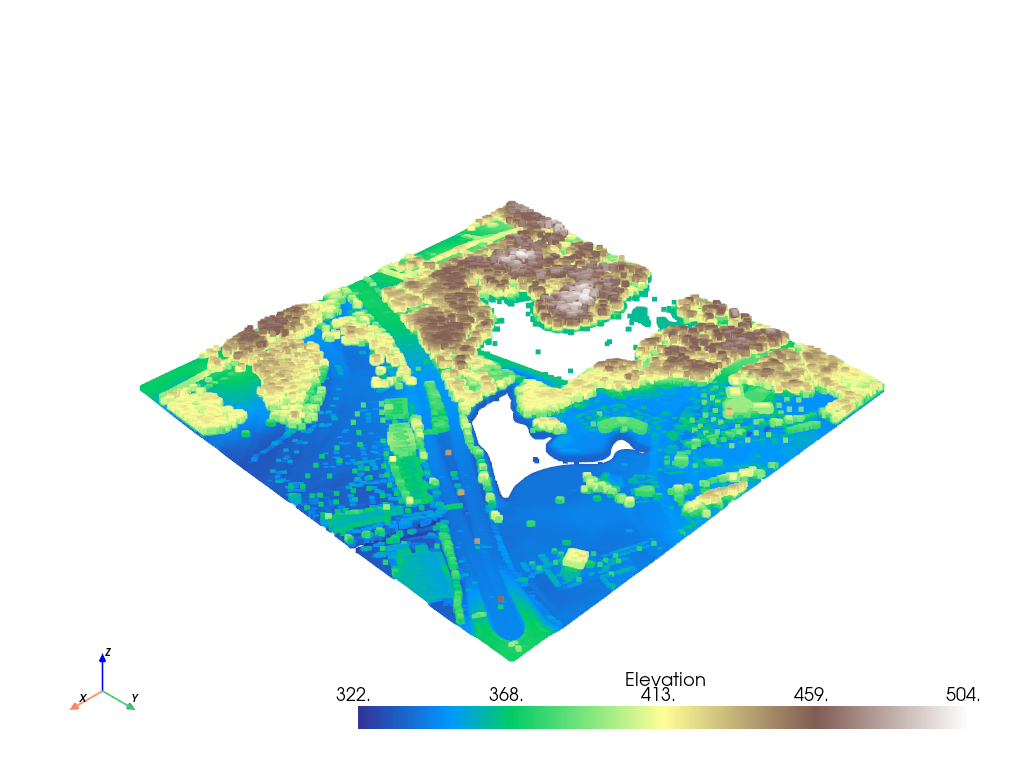

In [53]:
leafmap.view_lidar("madison.las")

In [54]:
wbt.lidar_elevation_slice("madison.las", "madison_rm.las", minz=0, maxz=450)

0

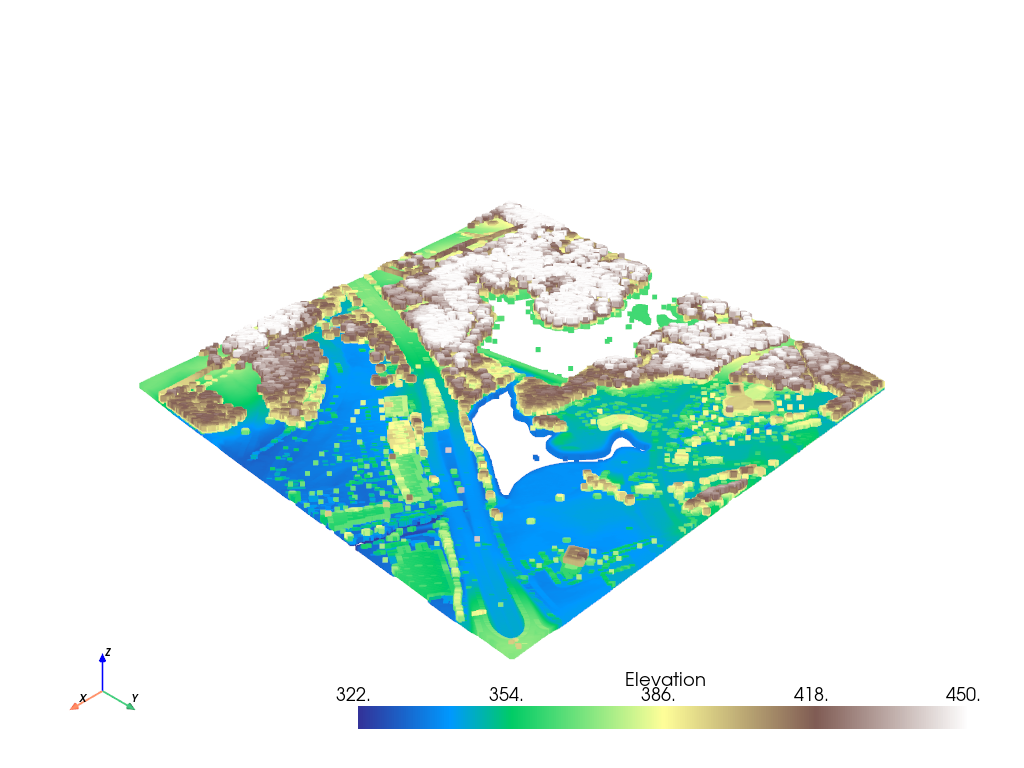

In [55]:
leafmap.view_lidar("madison_rm.las", cmap="terrain")

In [56]:
wbt.lidar_digital_surface_model(
    "madison_rm.las", "dsm.tif", resolution=1.0, minz=0, maxz=450
)

0

In [57]:
leafmap.add_crs("dsm.tif", epsg=2255)

In [58]:
m = leafmap.Map()
m.add_basemap("Satellite")
m.add_raster("dsm.tif", colormap="terrain", layer_name="DSM")
m

Map(center=[32.463625, -90.142313], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…